In [1]:
import ndlib
import numpy as np
import pandas as pd
import difflib
import json

import networkx as nx
import ndlib.models.ModelConfig as mc

# Company graph

In [2]:
G = nx.read_edgelist('/Users/Cava/Desktop/University/Data Science & Business Informatics/Social Network Analysis/Project/Network_finale_12_07.csv', data=(('weight',int),('industry',int)), delimiter=",")

In [3]:
G

In [4]:
import ndlib.models.epidemics as ep
# Model Configuration

model = ep.ProfileModel(G)
config = mc.Configuration()

infected_nodes = ["ACCENTURE", "GRUPPO GENERALI SPA", "PWC SPA", "DELOITTE", "VODAFONE SPA", "GRUPPO INTESA SANPAOLO", "REPLY SPA", "KPMG SPA"]
config.add_model_initial_configuration("Infected", infected_nodes)
config.add_model_parameter('blocked', 0.1)
config.add_model_parameter('adopter_rate', 0.001)

In [5]:
model.available_statuses

{'Susceptible': 0, 'Infected': 1, 'Blocked': -1}

In [6]:
profile = 0.15
for i in G.nodes():
    config.add_node_configuration("profile", i, profile)

In [7]:
model.set_initial_status(config)

In [8]:
iterations = model.iteration_bunch(10, node_status=True)

100%|██████████| 10/10 [00:35<00:00,  3.55s/it]


In [9]:
iterations

[{'iteration': 0,
  'status': {'PERMASTEELISA': 0,
   'SALINI SPA': 0,
   'YOOX NET-A-PORTER GROUP': 0,
   'SOMEC SPA': 0,
   'RIZZANI DE ECCHER': 0,
   'RAZORFISH HEALTHWARE': 0,
   'TMD FRICTION ESCO GMBH': 0,
   'BENETTON GROUP SPA': 0,
   'BLUE FORM STUDIO SRL': 0,
   'BLUESTEEL SRL': 0,
   'ACCENTURE': 1,
   'FINCANTIERI SPA': 0,
   'H3G': 0,
   'FREELANCE': 0,
   'MAIRE TECNIMONT SPA': 0,
   'ABB': 0,
   'RENCO SPA': 0,
   'COOPERATIVA MURATORI E CEMENTISTI DI RAVENNA': 0,
   'POLITECNICO DI MILANO': 0,
   'GRUPPO GENERALI SPA': 1,
   'ENEL': 0,
   'PWC SPA': 1,
   'ALITALIA SPA': 0,
   'GRUPPO FIAT': 0,
   'SAIPEM SPA': 0,
   'ASTALDI SPA': 0,
   'VALENTINO': 0,
   "UNIVERSITÀ DEGLI STUDI DI ROMA 'LA SAPIENZA'": 0,
   'WIND TRE SPA': 0,
   'UNICREDIT GROUP': 0,
   'TECHINT GROUP': 0,
   "SOCIETÀ ITALIANA PER CONDOTTE D'ACQUA SPA": 0,
   'THALES ALENIA SPACE SPA': 0,
   'WEBUILD': 0,
   'TENOVA': 0,
   'SOILMEC': 0,
   'TOTO SPA': 0,
   'THE LANE CONSTRUCTION CORPORATION': 0,
   

In [10]:
trends = model.build_trends(iterations)
trends

[{'trends': {'node_count': {0: [14867,
     12745,
     5997,
     3998,
     3641,
     3559,
     3538,
     3528,
     3520,
     3515],
    1: [8, 1830, 7636, 9369, 9679, 9747, 9767, 9775, 9781, 9786],
    -1: [0, 300, 1242, 1508, 1555, 1569, 1570, 1572, 1574, 1574]},
   'status_delta': {0: [0, -2122, -6748, -1999, -357, -82, -21, -10, -8, -5],
    1: [0, 1822, 5806, 1733, 310, 68, 20, 8, 6, 5],
    -1: [0, 300, 942, 266, 47, 14, 1, 2, 2, 0]}}}]

In [11]:
import matplotlib
# Force matplotlib to not use any Xwindows backend.
matplotlib.use('Agg')

In [12]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)

viz.plot()

no display found. Using non-interactive Agg backend


/opt/anaconda3/lib/python3.7/site-packages/ndlib/viz/mpl/DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [13]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()

/opt/anaconda3/lib/python3.7/site-packages/ndlib/viz/mpl/DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


# Barabasi-Albert

In [14]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

In [15]:
NNODES = G.number_of_nodes()
NNODES

NEDGES = G.number_of_edges()
NEDGES

LMAX = (NNODES * NNODES - 1) / 2

print("Number of Nodes: ", NNODES)
print("Number of Edged: ", NEDGES)
print("LMAX: ", LMAX)

Number of Nodes:  14875
Number of Edged:  43932
LMAX:  110632812.0


In [16]:
# network generators 3 (preferential attachment)
ba = nx.barabasi_albert_graph(NNODES, m=3, seed = 42)

ba.number_of_edges()

44616

In [17]:
import ndlib.models.epidemics as ep

model = ep.ProfileModel(ba)
config = mc.Configuration()
config.add_model_parameter('blocked', 0.1)
config.add_model_parameter('adopter_rate', 0.001)
config.add_model_parameter('fraction_infected', 0.00054)

In [18]:
profile = 0.15
for i in ba.nodes():
    config.add_node_configuration("profile", i, profile)

In [19]:
model.set_initial_status(config)

In [20]:
iterations = model.iteration_bunch(10, node_status=True)

100%|██████████| 10/10 [00:34<00:00,  3.47s/it]


In [21]:
trends = model.build_trends(iterations)
trends

[{'trends': {'node_count': {0: [14867,
     14783,
     13776,
     7764,
     1955,
     720,
     539,
     515,
     513,
     512],
    1: [8, 83, 949, 6136, 11182, 12240, 12395, 12416, 12418, 12419],
    -1: [0, 9, 150, 975, 1738, 1915, 1941, 1944, 1944, 1944]},
   'status_delta': {0: [0, -84, -1007, -6012, -5809, -1235, -181, -24, -2, -1],
    1: [0, 75, 866, 5187, 5046, 1058, 155, 21, 2, 1],
    -1: [0, 9, 141, 825, 763, 177, 26, 3, 0, 0]}}}]

In [22]:
import matplotlib
# Force matplotlib to not use any Xwindows backend.
matplotlib.use('Agg')

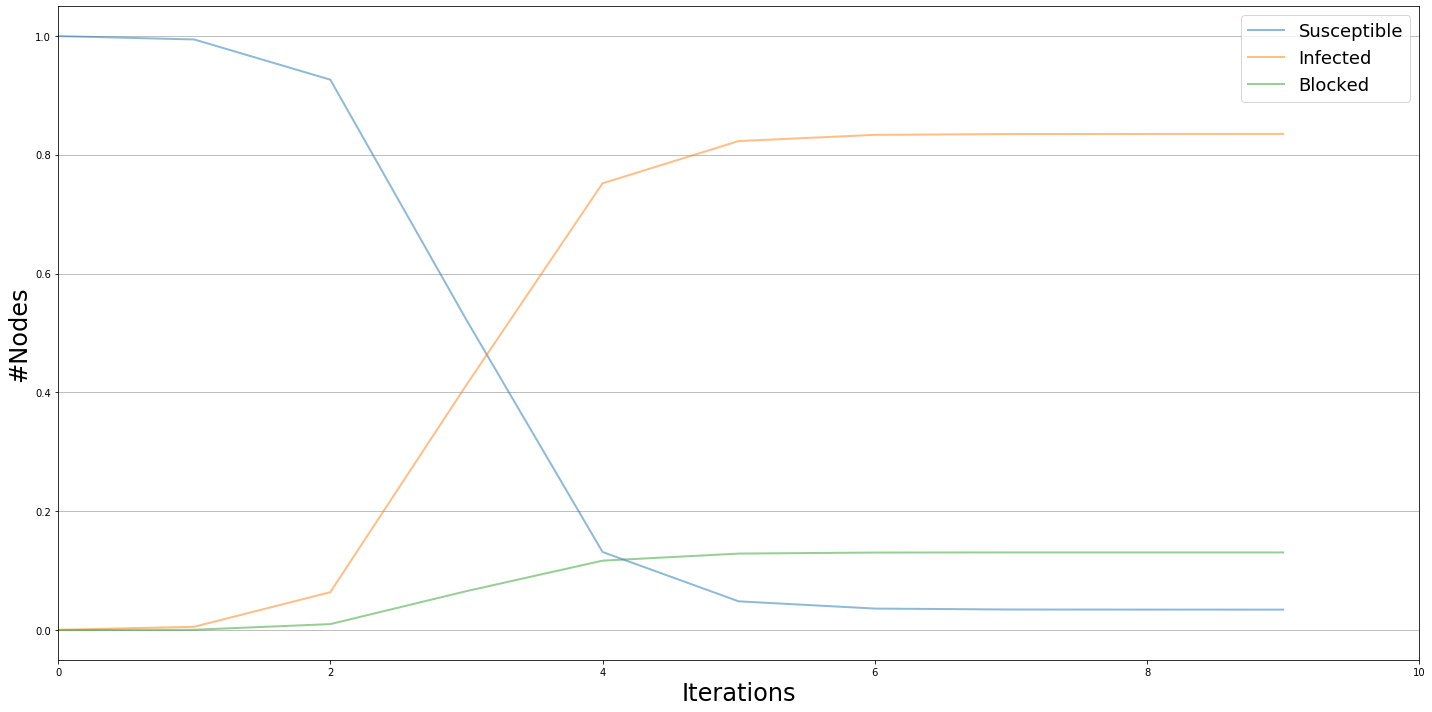

In [23]:
%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)

viz.plot()

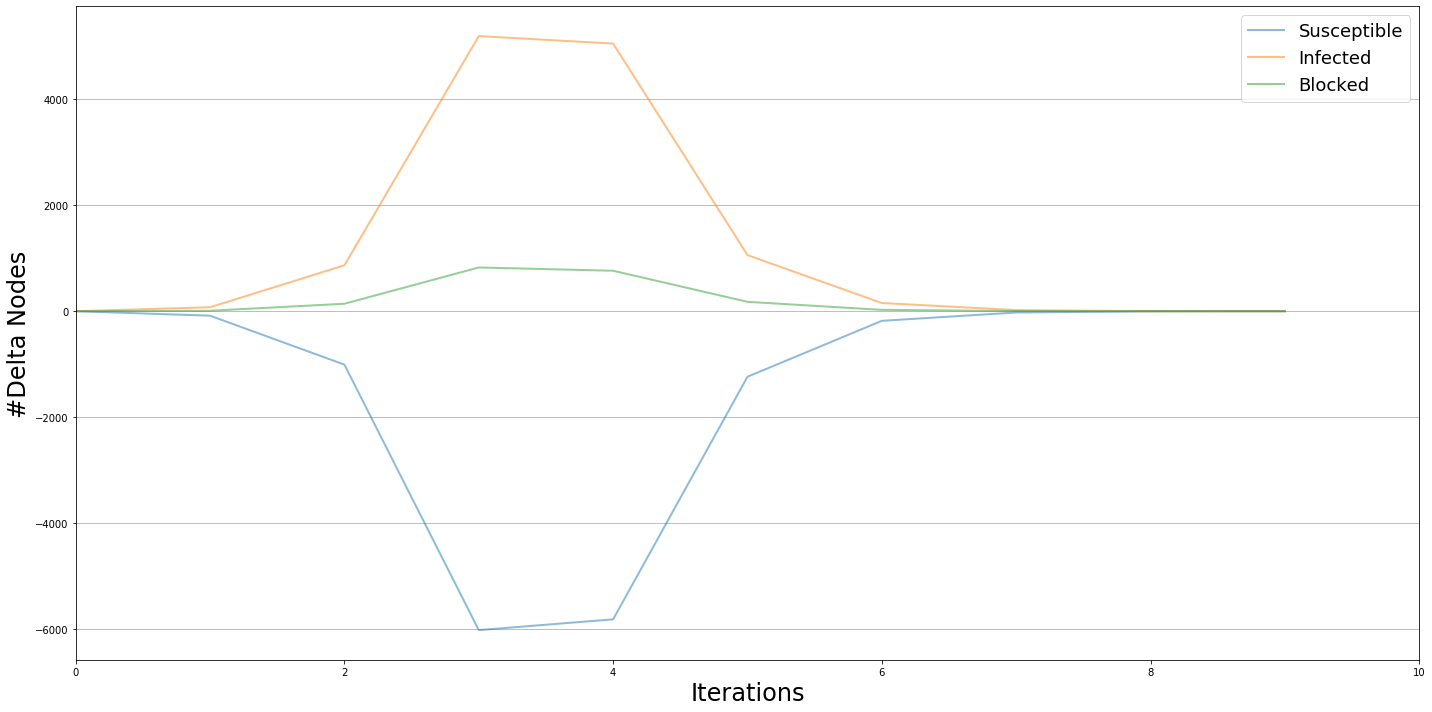

In [24]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()

# Erdos-Renyi

In [25]:
er = nx.erdos_renyi_graph(NNODES, p=0.00036 , directed = False, seed = 42) 

In [26]:
model = ep.ProfileModel(er)
config.add_model_parameter("percentage_infected", 0.02)
model.set_initial_status(config)

In [27]:
profile = 0.15
for i in er.nodes():
    config.add_node_configuration("profile", i, profile)

In [28]:
iterations = model.iteration_bunch(10, node_status=True)
iterations

100%|██████████| 10/10 [00:27<00:00,  2.77s/it]


[{'iteration': 0,
  'status': {0: 0,
   1: 0,
   2: 0,
   3: 0,
   4: 0,
   5: 0,
   6: 0,
   7: 0,
   8: 0,
   9: 0,
   10: 0,
   11: 0,
   12: 0,
   13: 0,
   14: 0,
   15: 0,
   16: 0,
   17: 0,
   18: 0,
   19: 0,
   20: 0,
   21: 0,
   22: 0,
   23: 0,
   24: 0,
   25: 0,
   26: 0,
   27: 0,
   28: 0,
   29: 0,
   30: 0,
   31: 0,
   32: 0,
   33: 0,
   34: 0,
   35: 0,
   36: 0,
   37: 0,
   38: 0,
   39: 0,
   40: 0,
   41: 0,
   42: 0,
   43: 0,
   44: 0,
   45: 0,
   46: 0,
   47: 0,
   48: 0,
   49: 0,
   50: 0,
   51: 1,
   52: 0,
   53: 0,
   54: 0,
   55: 0,
   56: 0,
   57: 0,
   58: 0,
   59: 0,
   60: 0,
   61: 0,
   62: 0,
   63: 0,
   64: 0,
   65: 0,
   66: 0,
   67: 0,
   68: 0,
   69: 0,
   70: 0,
   71: 0,
   72: 0,
   73: 0,
   74: 0,
   75: 0,
   76: 0,
   77: 0,
   78: 0,
   79: 0,
   80: 0,
   81: 0,
   82: 0,
   83: 0,
   84: 0,
   85: 0,
   86: 0,
   87: 0,
   88: 0,
   89: 0,
   90: 0,
   91: 0,
   92: 0,
   93: 0,
   94: 0,
   95: 0,
   96: 0,
   97: 0,
  

In [29]:
trends = model.build_trends(iterations)
trends

[{'trends': {'node_count': {0: [14578,
     13085,
     8647,
     3086,
     1001,
     666,
     620,
     610,
     608,
     608],
    1: [297, 1586, 5385, 10201, 11983, 12269, 12309, 12318, 12320, 12320],
    -1: [0, 204, 843, 1588, 1891, 1940, 1946, 1947, 1947, 1947]},
   'status_delta': {0: [0, -1493, -4438, -5561, -2085, -335, -46, -10, -2, 0],
    1: [0, 1289, 3799, 4816, 1782, 286, 40, 9, 2, 0],
    -1: [0, 204, 639, 745, 303, 49, 6, 1, 0, 0]}}}]

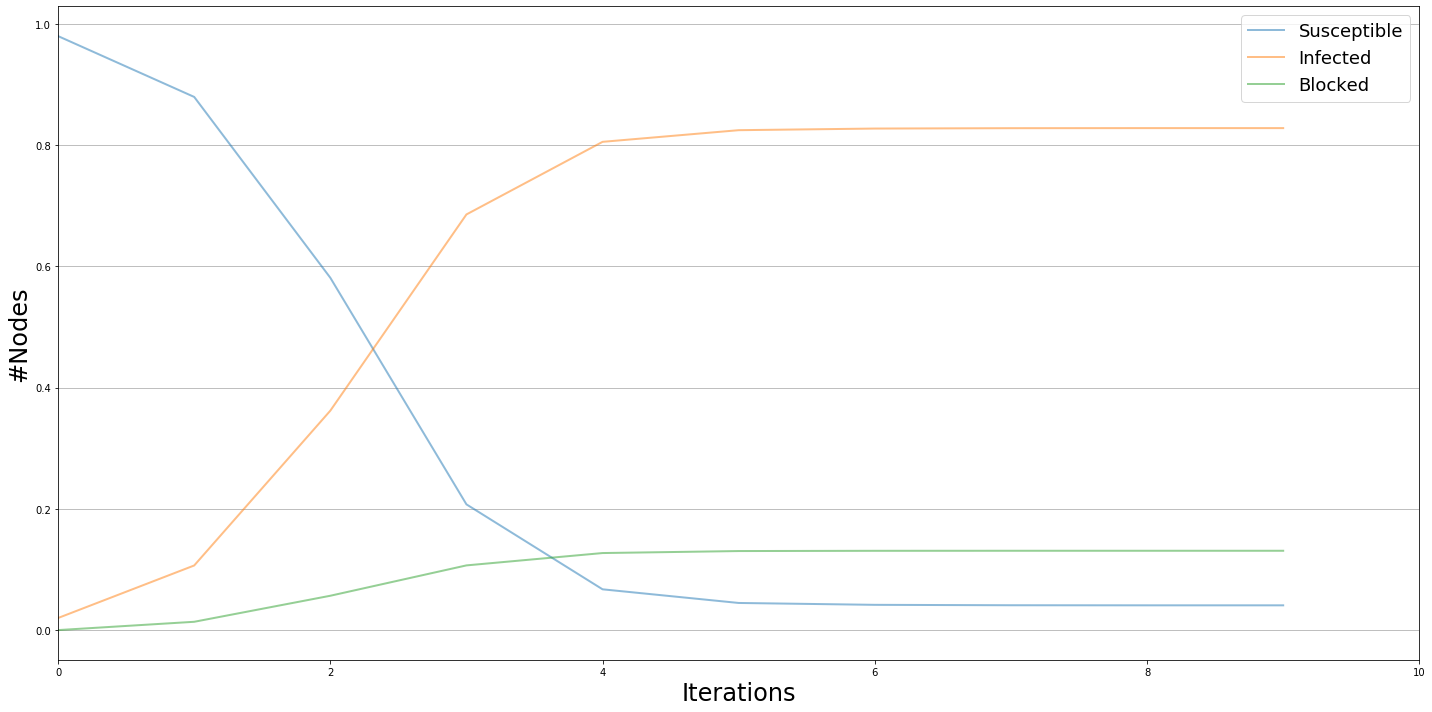

In [30]:
import matplotlib
matplotlib.use('Agg')

%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

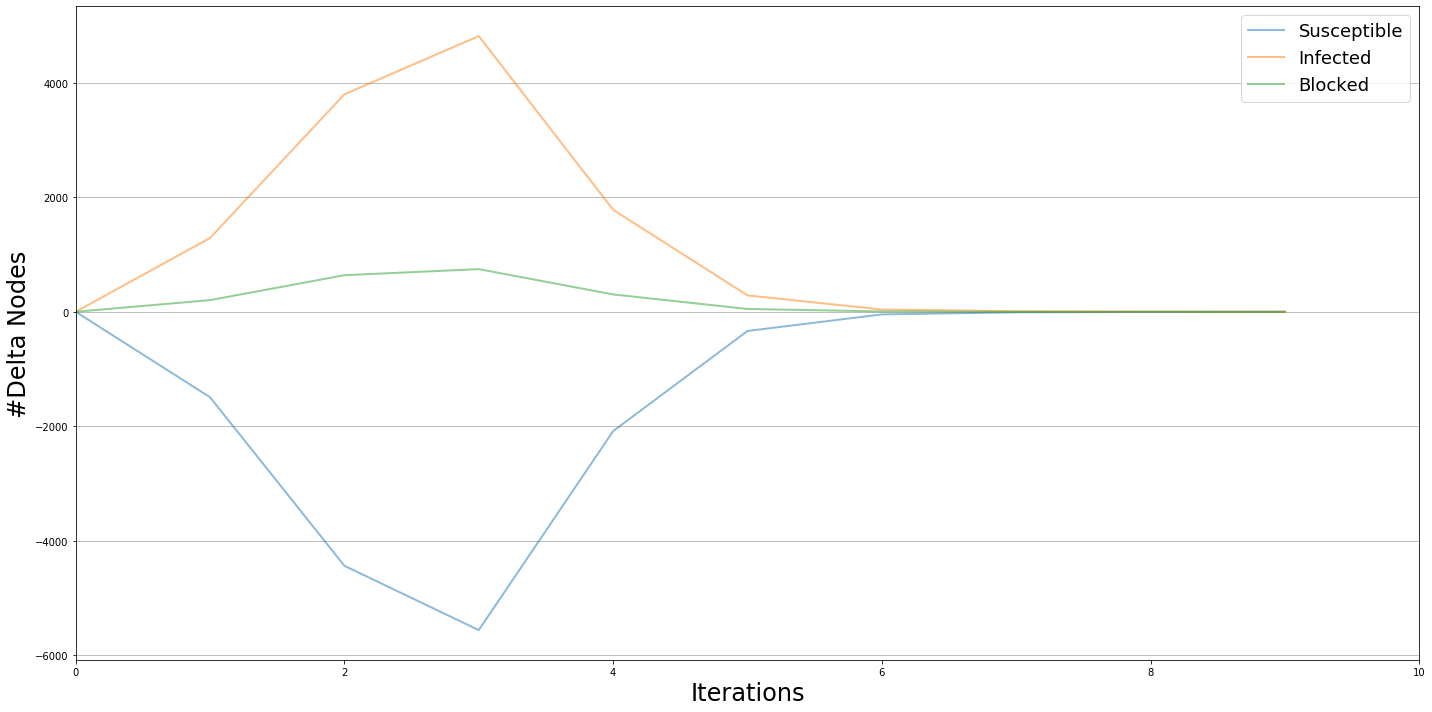

In [31]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()

# Watts-Strogatz

In [32]:
ws = nx.watts_strogatz_graph(NNODES, k=6, p=0.1, seed = 42)

In [33]:
model = ep.ProfileModel(ws)
config.add_model_parameter("percentage_infected", 0.02)
model.set_initial_status(config)

In [34]:
profile = 0.15
for i in ws.nodes():
    config.add_node_configuration("profile", i, profile)

In [35]:
iterations = model.iteration_bunch(10, node_status=True)
iterations

100%|██████████| 10/10 [00:34<00:00,  3.42s/it]


[{'iteration': 0,
  'status': {0: 0,
   1: 0,
   2: 0,
   3: 0,
   4: 0,
   5: 0,
   6: 0,
   7: 0,
   8: 0,
   9: 0,
   10: 0,
   11: 0,
   12: 0,
   13: 0,
   14: 0,
   15: 0,
   16: 0,
   17: 0,
   18: 0,
   19: 0,
   20: 0,
   21: 0,
   22: 0,
   23: 0,
   24: 0,
   25: 0,
   26: 0,
   27: 0,
   28: 0,
   29: 0,
   30: 0,
   31: 1,
   32: 0,
   33: 0,
   34: 0,
   35: 0,
   36: 0,
   37: 0,
   38: 0,
   39: 1,
   40: 0,
   41: 0,
   42: 0,
   43: 0,
   44: 0,
   45: 0,
   46: 0,
   47: 0,
   48: 0,
   49: 0,
   50: 0,
   51: 0,
   52: 0,
   53: 0,
   54: 0,
   55: 0,
   56: 0,
   57: 0,
   58: 0,
   59: 0,
   60: 0,
   61: 0,
   62: 0,
   63: 0,
   64: 0,
   65: 0,
   66: 0,
   67: 0,
   68: 0,
   69: 0,
   70: 0,
   71: 0,
   72: 0,
   73: 0,
   74: 0,
   75: 0,
   76: 0,
   77: 0,
   78: 0,
   79: 0,
   80: 0,
   81: 0,
   82: 0,
   83: 0,
   84: 0,
   85: 0,
   86: 0,
   87: 0,
   88: 0,
   89: 0,
   90: 0,
   91: 0,
   92: 0,
   93: 0,
   94: 0,
   95: 0,
   96: 0,
   97: 0,
  

In [36]:
trends = model.build_trends(iterations)
trends

[{'trends': {'node_count': {0: [14578,
     12917,
     10395,
     6697,
     3259,
     1382,
     632,
     417,
     357,
     334],
    1: [297, 1750, 3948, 7130, 10082, 11716, 12349, 12532, 12584, 12600],
    -1: [0, 208, 532, 1048, 1534, 1777, 1894, 1926, 1934, 1941]},
   'status_delta': {0: [0,
     -1661,
     -2522,
     -3698,
     -3438,
     -1877,
     -750,
     -215,
     -60,
     -23],
    1: [0, 1453, 2198, 3182, 2952, 1634, 633, 183, 52, 16],
    -1: [0, 208, 324, 516, 486, 243, 117, 32, 8, 7]}}}]

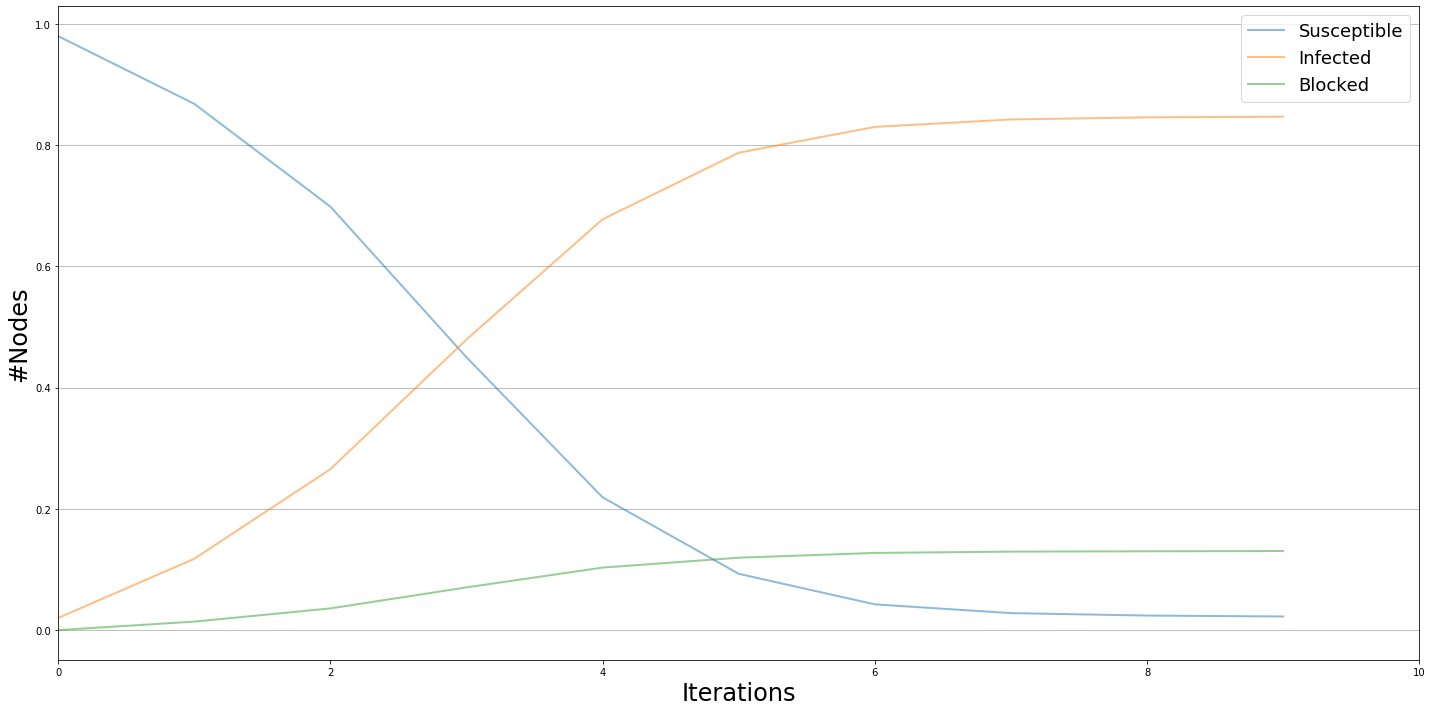

In [37]:
import matplotlib
matplotlib.use('Agg')

%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()

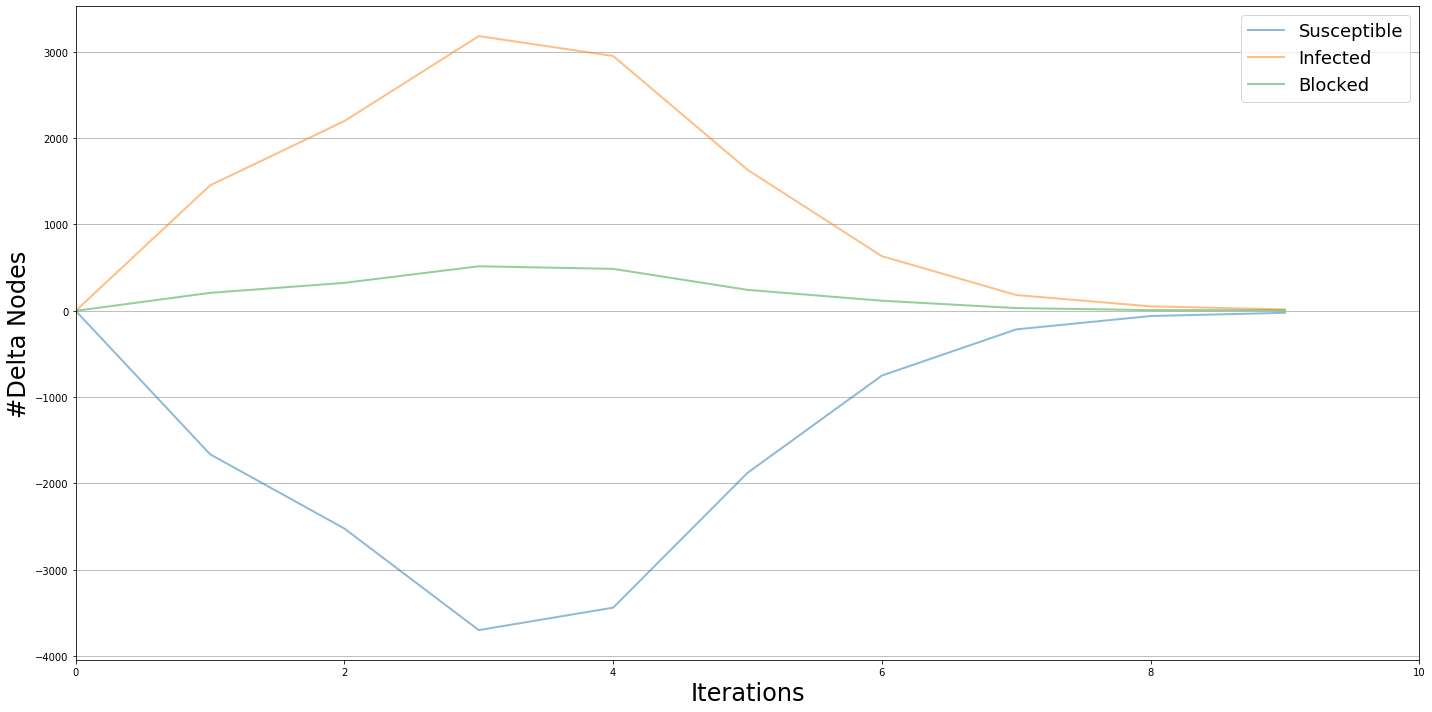

In [38]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
viz = DiffusionPrevalence(model, trends)
viz.plot()